#### Notes / Links

List of named colors instead of using codes:<br>
&emsp;https://matplotlib.org/3.1.0/gallery/color/named_colors.html

Spines of a graph:<br>
&emsp;https://matplotlib.org/3.3.3/api/spines_api.html?highlight=spines#module-matplotlib.spines
    
Making subplots fit better with themselves:<br>
&emsp;https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.tight_layout.html#matplotlib.pyplot.tight_layout

Boxplot code ideas:<br>
&emsp;https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643<br>
&emsp;https://matplotlib.org/3.1.0/gallery/statistics/boxplot.html

In [344]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

In [393]:
# Import each raw data .csv file
# Note: the original datasets are not published

metalcore_data = pd.read_csv('Data/Metalcore.csv',header=None)
classical_data = pd.read_csv('Data/Classical.csv',header=None)
silence_data = pd.read_csv('Data/Silence.csv',header=None)
tv_data = pd.read_csv('Data/TV.csv',header=None)
audiobook_data = pd.read_csv('Data/Audiobook.csv',header=None)
country_data = pd.read_csv('Data/Country.csv',header=None)
##
metalcore_data = metalcore_data.rename(columns={0: 'Metalcore'})
classical_data = classical_data.rename(columns={0: 'Classical'})
silence_data = silence_data.rename(columns={0: 'Silence'})
tv_data = tv_data.rename(columns={0: 'TV Show'})
audiobook_data = audiobook_data.rename(columns={0: 'Audiobook'})
country_data = country_data.rename(columns={0: 'Country'})
##
silence_data.describe()

,Silence
count,360.000000
mean,28.843694
std,3.878197
min,21.000000
25%,25.685000
50%,28.740000
75%,32.042500
max,39.590000


In [160]:
metalcore_std = metalcore_data.std()
classical_std = classical_data.std()
silence_std = silence_data.std()
tv_std = tv_data.std()
audiobook_std = audiobook_data.std()
country_std = country_data.std()

metalcore_stddev = str(round(metalcore_std[0],3))
classical_stddev = str(round(classical_std[0],3))
silence_stddev = str(round(silence_std[0],3))
tv_stddev = str(round(tv_std[0],3))
audiobook_stddev = str(round(audiobook_std[0],3))
country_stddev = str(round(country_std[0],3))

# Histogram Creation

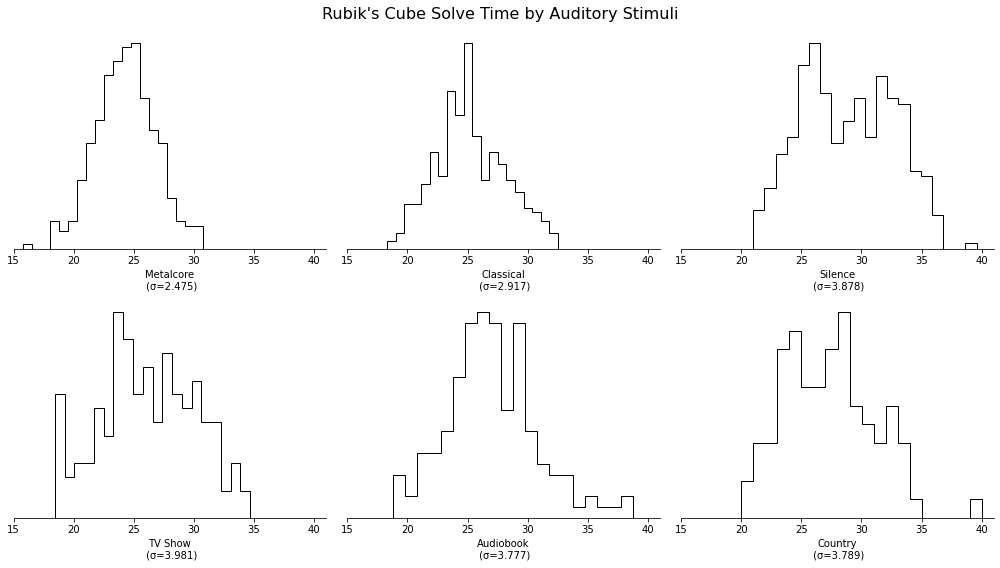

In [391]:
hist_small_multiple = plt.figure(figsize=(14,8))
plt.suptitle('Rubik\'s Cube Solve Time by Auditory Stimuli', fontsize=16)

ax1 = plt.subplot(231)
ax1.hist(metalcore_data, 20, histtype='step', color='black')
# plt.title('Metalcore')
plt.xlabel('Metalcore\n (σ='+metalcore_stddev+')')
plt.yticks([])
plt.xlim([15, 41])
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
#
ax2 = plt.subplot(232)
ax2.hist(classical_data, 20, histtype='step', color='black')
# plt.title('Classical')
plt.xlabel('Classical\n (σ='+classical_stddev+')')
plt.yticks([])
plt.xlim([15, 41])
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
#
ax3 = plt.subplot(233)
ax3.hist(silence_data, 20, histtype='step', color='black')
# plt.title('Silence')
plt.xlabel('Silence\n (σ='+silence_stddev+')')
plt.yticks([])
plt.xlim([15, 41])
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
#
ax4 = plt.subplot(234)
ax4.hist(tv_data, 20, histtype='step', color='black')
# plt.title('TV Show')
plt.xlabel('TV Show\n (σ='+tv_stddev+')')
plt.yticks([])
plt.xlim([15, 41])
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
#
ax5 = plt.subplot(235)
ax5.hist(audiobook_data, 20, histtype='step', color='black')
# plt.title('Audiobook')
plt.xlabel('Audiobook\n (σ='+audiobook_stddev+')')
plt.yticks([])
plt.xlim([15, 41])
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['right'].set_visible(False)
#
ax6 = plt.subplot(236)
ax6.hist(country_data, 20, histtype='step', color='black')
# plt.title('Country')
plt.xlabel('Country\n (σ='+country_stddev+')')
plt.yticks([])
plt.xlim([15, 41])
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['right'].set_visible(False)

plt.tight_layout(w_pad=1.5, h_pad=1.0)

plt.show()

In [392]:
hist_small_multiple.savefig('Images\Hist_Small_Multiple.png', dpi=300)

# Boxplot Creation

In [260]:
# print(metalcore_data)

metalcore_times = metalcore_data['Metalcore'].to_list()
classical_times = classical_data['Classical'].to_list()
silence_times = silence_data['Silence'].to_list()
tv_times = tv_data['TV Show'].to_list()
audiobook_times = audiobook_data['Audiobook'].to_list()
country_times = country_data['Country'].to_list()

times = [metalcore_times, classical_times, silence_times, tv_times, audiobook_times, country_times]

In [249]:
# box_whisker = plt.figure(figsize=(8,6))

# ax1 = plt.subplot(111)
# ax1.boxplot(times)
# plt.xticks([1, 2, 3, 4, 5, 6], ['Metalcore', 'Classical', 'Silence', 'TV Show', 'Audiobook', 'Country'])

# plt.tight_layout(w_pad=.5, h_pad=1.0)
# plt.show()

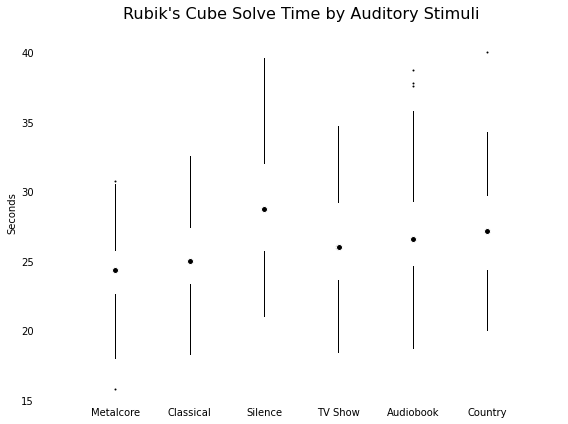

In [259]:
labels = ['Metalcore', 'Classical', 'Silence', 'TV Show', 'Audiobook', 'Country']
flierprops = dict(marker='.', markerfacecolor='black', markersize=2, linestyle='none')
medianprops = dict(marker='.', markerfacecolor='black', markeredgecolor='white', markersize=12, linestyle='none')

fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel('Seconds')
plt.title('Rubik\'s Cube Solve Time by Auditory Stimuli', fontsize=16)
plt.xlim([0, 1.75])
plt.ylim([15, 42])


ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.boxplot(times[0], positions=[.25], labels=[labels[0]], widths=.001,
           flierprops=flierprops, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[1], positions=[.5], labels=[labels[1]], widths=.001,
           flierprops=flierprops, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[2], positions=[.75], labels=[labels[2]], widths=.001,
           flierprops=flierprops, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[3], positions=[1], labels=[labels[3]], widths=.001,
           flierprops=flierprops, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[4], positions=[1.25], labels=[labels[4]], widths=.001,
           flierprops=flierprops, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[5], positions=[1.5], labels=[labels[5]], widths=.001,
           flierprops=flierprops, medianprops=medianprops, 
           showbox=False, showcaps=False)

plt.tight_layout(w_pad=.5, h_pad=1.0)
plt.show()
fig.savefig('Images\BoxPlot_Outliers.png', dpi=300)

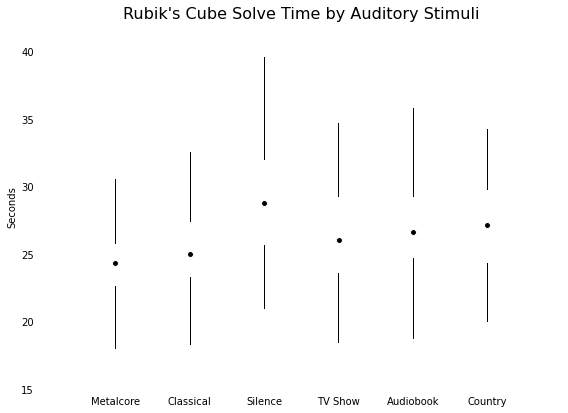

In [258]:
labels = ['Metalcore', 'Classical', 'Silence', 'TV Show', 'Audiobook', 'Country']
flierprops = dict(marker='.', markerfacecolor='black', markersize=4, linestyle='none')
medianprops = dict(marker='.', markerfacecolor='black', markeredgecolor='white', markersize=12, linestyle='none')

fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel('Seconds')
plt.title('Rubik\'s Cube Solve Time by Auditory Stimuli', fontsize=16)
plt.xlim([0, 1.75])
plt.ylim([15, 42])


ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.boxplot(times[0], positions=[.25], labels=[labels[0]], widths=.001,
           showfliers=False, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[1], positions=[.5], labels=[labels[1]], widths=.001,
           showfliers=False, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[2], positions=[.75], labels=[labels[2]], widths=.001,
           showfliers=False, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[3], positions=[1], labels=[labels[3]], widths=.001,
           showfliers=False, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[4], positions=[1.25], labels=[labels[4]], widths=.001,
           showfliers=False, medianprops=medianprops, 
           showbox=False, showcaps=False)
ax.boxplot(times[5], positions=[1.5], labels=[labels[5]], widths=.001,
           showfliers=False, medianprops=medianprops, 
           showbox=False, showcaps=False)

plt.tight_layout(w_pad=.5, h_pad=1.0)
plt.show()
fig.savefig('Images\BoxPlot_No_Outliers.png', dpi=300)

# Statistical Difference?

In [407]:
metalcore_sample = metalcore_data.sample(n=75, random_state=1)
classical_sample = classical_data.sample(n=75, random_state=1)
silence_sample = silence_data.sample(n=75, random_state=2)
tv_sample = tv_data.sample(n=75, random_state=1)
audiobook_sample = audiobook_data.sample(n=75, random_state=1)
country_sample = country_data.sample(n=75, random_state=1)
#
# Save the samples to .csv (to be shared publically)
metalcore_sample.to_csv('Sample Data\Metalcore.csv', index=False)
classical_sample.to_csv('Sample Data\Classical.csv', index=False)
silence_sample.to_csv('Sample Data\Silence.csv', index=False)
tv_sample.to_csv('Sample Data\TV Show.csv', index=False)
audiobook_sample.to_csv('Sample Data\Audiobook.csv', index=False)
country_sample.to_csv('Sample Data\Country.csv', index=False)

In [373]:
sample_list = [metalcore_sample, classical_sample, silence_sample, tv_sample, audiobook_sample, country_sample]
j=0
for i in sample_list:
    stat, p = stats.shapiro(i)
    if p > .05:
        print(labels[j],'good: p=%.3f' % (p))
    else:
        print(labels[j],'not good.')
    j -=- 1

Metalcore good: p=0.830
Classical good: p=0.184
Silence good: p=0.214
TV Show good: p=0.096
Audiobook good: p=0.071
Country good: p=0.077


In [402]:
j=0
confidence = 95
alpha = 1-(confidence/100)

for i in sample_list:
    if labels[j] != 'Silence':
        stat, p = ttest_ind(i, silence_sample)
        if p > alpha:
            print(labels[j],'- \tSame distributions (fail to reject H0)')
        else:
            print(labels[j],'- \tDifferent distributions (reject H0) (p=%.6f)' % (p))
    j -=- 1

Metalcore - 	Different distributions (reject H0) (p=0.000000)
Classical - 	Different distributions (reject H0) (p=0.000000)
TV Show - 	Different distributions (reject H0) (p=0.000013)
Audiobook - 	Different distributions (reject H0) (p=0.006095)
Country - 	Different distributions (reject H0) (p=0.040489)


In [403]:
j=0
confidence = 98
alpha = 1-(confidence/100)

for i in sample_list:
    if labels[j] != 'Silence':
        stat, p = ttest_ind(i, silence_sample)
        if p > alpha:
            print(labels[j],'- \tSame distributions (fail to reject H0)')
        else:
            print(labels[j],'- \tDifferent distributions (reject H0) (p=%.6f)' % (p))
    j -=- 1

Metalcore - 	Different distributions (reject H0) (p=0.000000)
Classical - 	Different distributions (reject H0) (p=0.000000)
TV Show - 	Different distributions (reject H0) (p=0.000013)
Audiobook - 	Different distributions (reject H0) (p=0.006095)
Country - 	Same distributions (fail to reject H0)


In [404]:
j=0
confidence = 99.5
alpha = 1-(confidence/100)

for i in sample_list:
    if labels[j] != 'Silence':
        stat, p = ttest_ind(i, silence_sample)
        if p > alpha:
            print(labels[j],'- \tSame distributions (fail to reject H0)')
        else:
            print(labels[j],'- \tDifferent distributions (reject H0) (p=%.6f)' % (p))
    j -=- 1

Metalcore - 	Different distributions (reject H0) (p=0.000000)
Classical - 	Different distributions (reject H0) (p=0.000000)
TV Show - 	Different distributions (reject H0) (p=0.000013)
Audiobook - 	Same distributions (fail to reject H0)
Country - 	Same distributions (fail to reject H0)
